# importing Libraries


In [ ]:

import tensorflow


In [ ]:
import numpy as np
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
from tensorflow.keras.datasets import mnist


In [ ]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

# Initializing Datasets

In [ ]:
digits_data = np.vstack([train_data, test_data])
digits_labels = np.hstack([train_labels, test_labels])

In [ ]:
np.random.randint(0, digits_data.shape[0])
import time

In [ ]:
dataset_az = pd.read_csv('/content/A_Z Handwritten Data.csv').astype('float32')
dataset_az

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
alphabet_data = dataset_az.drop('0', axis = 1)
alphabet_labels = dataset_az['0']

In [ ]:
alphabet_data.shape, alphabet_labels.shape

((372450, 784), (372450,))

In [ ]:
alphabet_data = np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28, 28))

In [ ]:
np.unique(digits_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
#alphabet labels overlap with number labels
alphabet_labels += 10
np.unique(alphabet_labels)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
      dtype=float32)

In [ ]:
data = np.vstack([alphabet_data, digits_data])
labels = np.hstack([alphabet_labels, digits_labels])

In [ ]:
data.shape, labels.shape

((442450, 28, 28), (442450,))

In [ ]:
np.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

In [ ]:
data = np.array(data,dtype = "float32")
data = np.expand_dims(data, axis = -1)
data.shape

(442450, 28, 28, 1)

# Preprocessing Data

In [ ]:
data[0].min(), data[0].max()

(0.0, 255.0)

In [ ]:
data /= 255.0

In [ ]:
np.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

In [ ]:
le = LabelBinarizer()
labels = le.fit_transform(labels)

In [ ]:
np.unique(labels)#OneHotEncoder

array([0, 1])

In [ ]:
labels[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
classes_total = labels.sum(axis = 0)
classes_total #unbalanced

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [ ]:
classes_weights = {}
for i in range(len(classes_total)):
  classes_weights[i] = classes_total.max() / classes_total[i]
classes_weights #balanced reweighting

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 1, stratify = labels)

In [ ]:
X_train.shape, X_test.shape

((353960, 28, 28, 1), (88490, 28, 28, 1))

In [ ]:
y_train.shape, y_test.shape

((353960, 36), (88490, 36))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
augmentation = ImageDataGenerator(
    rotation_range = 10,
    zoom_range = 0.05,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = False
)

# Building the Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
network = Sequential()

network.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (28, 28, 1)))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Flatten())
network.add(Dense(64, activation = 'relu'))
network.add(Dense(128, activation = 'relu'))

network.add(Dense(36, activation='softmax'))

network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 6, 6, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 3, 3, 128)        

In [ ]:
name_labels = '0123456789'
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
name_labels = [l for l in name_labels]

In [ ]:
print(name_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


# Training the Neural Network

In [ ]:
file_model = 'custom_ocr.model'
epochs = 20
batch_size = 128

In [ ]:
checkpointer = ModelCheckpoint(file_model, monitor = 'val loss', verbose = 1, save_the_best_only = True)

In [ ]:
len(X_train) // batch_size

2765

In [ ]:
history = network.fit(augmentation.flow(X_train, y_train, batch_size = batch_size),
                      validation_data = (X_test, y_test),
                      steps_per_epoch = len(X_train)//batch_size, epochs = epochs,
                      class_weight = classes_weights, verbose = 1, callbacks = [checkpointer])


Epoch 1/20
2765/2765 [==============================] - ETA: 0s - loss: 2.1343 - accuracy: 0.8286
Epoch 1: saving model to custom_ocr.model
2765/2765 [==============================] - 149s 52ms/step - loss: 2.1343 - accuracy: 0.8286 - val_loss: 0.3302 - val_accuracy: 0.8670
Epoch 2/20
2765/2765 [==============================] - ETA: 0s - loss: 0.9610 - accuracy: 0.9029
Epoch 2: saving model to custom_ocr.model
2765/2765 [==============================] - 143s 52ms/step - loss: 0.9610 - accuracy: 0.9029 - val_loss: 0.2916 - val_accuracy: 0.8817
Epoch 3/20
2765/2765 [==============================] - ETA: 0s - loss: 0.8036 - accuracy: 0.9145
Epoch 3: saving model to custom_ocr.model
2765/2765 [==============================] - 136s 49ms/step - loss: 0.8036 - accuracy: 0.9145 - val_loss: 0.2037 - val_accuracy: 0.9156
Epoch 4/20
2765/2765 [==============================] - ETA: 0s - loss: 0.7193 - accuracy: 0.9214
Epoch 4: saving model to custom_ocr.model
2765/2765 [=====================

# Evaluating the Neural Network


In [ ]:
predictions = network.predict(X_test, batch_size=batch_size)

692/692 [==============================] - 4s 5ms/step


In [ ]:
predictions[0]

array([4.4207242e-01, 1.3138259e-09, 5.5584040e-09, 2.4987830e-09,
       4.4066559e-07, 3.6375340e-08, 9.0980557e-06, 4.0432422e-09,
       4.1545427e-08, 2.6523355e-06, 7.8715665e-09, 1.2623566e-06,
       4.0703755e-05, 1.4481220e-03, 2.6446834e-09, 1.1796666e-16,
       1.1574390e-05, 2.0347904e-11, 2.9720607e-14, 1.3811712e-06,
       8.3792306e-11, 5.8904764e-08, 1.4240393e-11, 2.2221578e-04,
       5.5527890e-01, 3.7085796e-05, 7.3995290e-04, 7.9785817e-10,
       1.8029448e-07, 1.5289913e-07, 1.3368961e-04, 1.1382839e-10,
       3.7680426e-08, 1.2490010e-19, 2.8774080e-10, 9.9802729e-11],
      dtype=float32)

In [ ]:
np.argmax(predictions[0])

24

In [ ]:
name_labels[24]

'O'

In [ ]:
y_test[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
np.argmax(y_test[0])

24

In [ ]:
name_labels[np.argmax(y_test[0])]

'O'

In [ ]:
network.evaluate(X_test, y_test)

2766/2766 [==============================] - 14s 5ms/step - loss: 0.1111 - accuracy: 0.9671


[0.11107204854488373, 0.9671036005020142]

In [ ]:
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names = name_labels))

              precision    recall  f1-score   support

           0       0.64      0.43      0.52      1381
           1       0.98      0.99      0.98      1575
           2       0.94      0.96      0.95      1398
           3       0.97      0.99      0.98      1428
           4       0.98      0.93      0.95      1365
           5       0.77      0.93      0.84      1263
           6       0.98      0.95      0.97      1375
           7       0.96      1.00      0.98      1459
           8       0.96      0.98      0.97      1365
           9       0.96      0.99      0.97      1392
           A       1.00      0.98      0.99      2774
           B       0.98      0.98      0.98      1734
           C       0.99      0.99      0.99      4682
           D       0.95      0.96      0.95      2027
           E       0.99      0.98      0.99      2288
           F       0.98      1.00      0.99       233
           G       0.93      0.97      0.95      1152
           H       0.98    

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

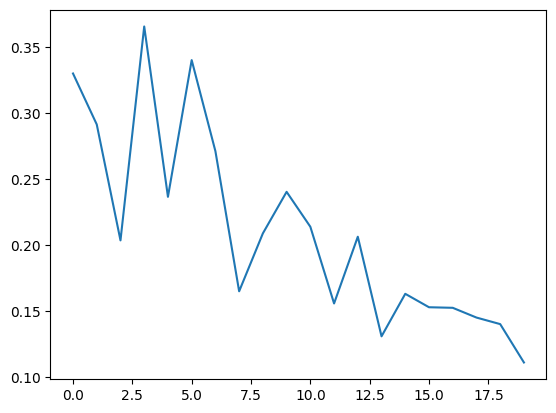

In [ ]:
plt.plot(history.history['val_loss'])

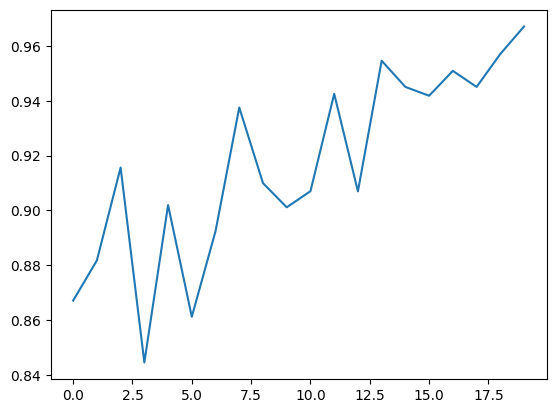

In [ ]:
plt.plot(history.history['val_accuracy'])

In [ ]:
network.save('network', save_format='h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp network /content/drive/MyDrive/Models/network

# **Testing the neural network with images**

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
loaded_network = load_model('/content/drive/MyDrive/Models/network')

In [ ]:
loaded_network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 6, 6, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 3, 3, 128)        

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/letter-m.jpg')
cv2_imshow(img)

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(30, 30)

In [ ]:
value, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
cv2_imshow(thresh)

In [ ]:
thresh.shape

(30, 30)

In [ ]:
img = cv2.resize(thresh, (28,28))
img.shape

(28, 28)

In [ ]:
import numpy as np
img = img.astype('float32') / 255
img = np.expand_dims(img, axis = -1)
img.shape

(28, 28, 1)

In [ ]:
img = np.reshape(img, (1, 28, 28 ,1))
img.shape

(1, 28, 28, 1)

In [ ]:
prediction = loaded_network.predict(img)
prediction

1/1 [==============================] - 1s 890ms/step


array([[3.5051942e-13, 1.5793099e-16, 8.6591831e-18, 2.9571307e-16,
        5.0197575e-11, 3.0103292e-16, 2.6715567e-15, 2.3086136e-13,
        4.3516553e-17, 1.0173544e-11, 2.8200131e-09, 8.3967237e-14,
        1.0348738e-12, 2.8451111e-11, 1.7548698e-14, 3.8816019e-19,
        4.4248840e-09, 2.3986613e-07, 7.6036539e-29, 3.4923595e-14,
        1.4406119e-07, 5.6714843e-13, 9.9996102e-01, 3.8484999e-05,
        1.1235480e-13, 3.2825379e-15, 2.3001429e-14, 3.0383962e-10,
        8.1912088e-10, 3.4953521e-10, 2.9270133e-09, 1.1984566e-20,
        1.3747960e-07, 1.2425631e-10, 8.4816441e-15, 2.7945666e-18]],
      dtype=float32)

In [ ]:
np.argmax(prediction) #M

22